In [102]:
import yfinance as yf
import os
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from xgboost import XGBClassifier, XGBRegressor

In [72]:
btc_ticker = yf.Ticker("BTC-USD")

In [73]:
btc = btc_ticker.history(period="max")

In [74]:
btc.index = pd.to_datetime(btc.index)

In [75]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-03 00:00:00+00:00,23469.412109,23678.103516,23279.955078,23449.322266,27083066007,0.0,0.0
2023-02-04 00:00:00+00:00,23446.320312,23556.949219,23291.794922,23331.847656,15639298538,0.0,0.0
2023-02-05 00:00:00+00:00,23332.248047,23423.435547,22841.759766,22955.666016,19564262605,0.0,0.0


In [76]:
del btc["Dividends"]
del btc["Stock Splits"]

In [77]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-02-03 00:00:00+00:00,23469.412109,23678.103516,23279.955078,23449.322266,27083066007
2023-02-04 00:00:00+00:00,23446.320312,23556.949219,23291.794922,23331.847656,15639298538
2023-02-05 00:00:00+00:00,23332.248047,23423.435547,22841.759766,22955.666016,19564262605


<AxesSubplot: xlabel='Date'>

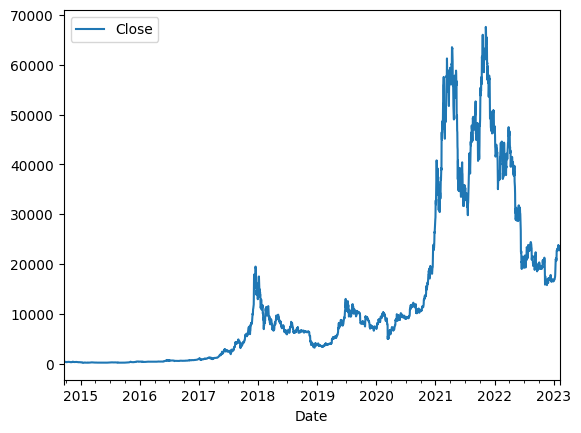

In [78]:
btc.plot.line(y="Close", use_index=True)

In [79]:
wiki = pd.read_csv('wikipedia_edits.csv', index_col=0, parse_dates=True)

In [80]:
wiki

,edit_count,sentiment,neg_sentiment
2021-01-01,0.866667,-0.179525,0.294444
2021-01-02,0.833333,-0.147559,0.261111
2021-01-03,0.833333,-0.147559,0.261111
2021-01-04,0.833333,-0.147559,0.261111
2021-01-05,0.866667,-0.150237,0.261111
...,...,...,...
2023-02-02,0.600000,-0.160175,0.245556
2023-02-03,0.600000,-0.160175,0.245556
2023-02-04,0.600000,-0.160175,0.245556
2023-02-05,0.600000,-0.160175,0.245556


In [81]:
btc = btc.tz_localize(None)
btc = btc.merge(wiki, left_index=True, right_index=True)

In [82]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,0.866667,-0.179525,0.294444
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,0.833333,-0.147559,0.261111
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,0.833333,-0.147559,0.261111
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,0.833333,-0.147559,0.261111
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,67547324782,0.866667,-0.150237,0.261111
...,...,...,...,...,...,...,...,...
2023-02-02,23720.824219,24167.210938,23468.595703,23471.871094,32066936882,0.600000,-0.160175,0.245556
2023-02-03,23469.412109,23678.103516,23279.955078,23449.322266,27083066007,0.600000,-0.160175,0.245556
2023-02-04,23446.320312,23556.949219,23291.794922,23331.847656,15639298538,0.600000,-0.160175,0.245556
2023-02-05,23332.248047,23423.435547,22841.759766,22955.666016,19564262605,0.600000,-0.160175,0.245556


In [83]:
btc["tomorrow"] = btc["Close"].shift(-1)

In [84]:
btc["target"] = (btc["tomorrow"] > btc["Close"]).astype(int)

In [85]:
btc["target"].value_counts()

0    389
1    378
Name: target, dtype: int64

In [86]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["Close", "Volume", "Open", "High", "Low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [88]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.4899328859060403

In [89]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    
    return combined

In [90]:
# This function takesin the amount of data to observe for the prediction, start is how many days before the prediction, and end is how many days to predict.
def backtest(data, model, predictors, start=60, step=7):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [124]:
model = XGBClassifier(random_state=1, learning_rate=0.08, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [122]:
predictions

,target,predictions
2021-03-02,1,1
2021-03-03,0,1
2021-03-04,1,1
2021-03-05,0,1
2021-03-06,1,1
...,...,...
2023-02-02,0,1
2023-02-03,0,0
2023-02-04,0,1
2023-02-05,0,1


In [125]:
precision_score(predictions["target"], predictions["predictions"])

0.46923076923076923

In [126]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["Close", "sentiment", "neg_sentiment"]
    
    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()
        
        ration_column = f"close_ratio_{horizon}"
        btc[ration_column] = btc["Close"] / rolling_averages["Close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]
        
        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]
        
        new_predictors += [ ration_column, trend_column, edit_column]
    return btc, new_predictors

In [127]:
btc, new_predictors = compute_rolling(btc.copy())

In [115]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,0.866667,-0.179525,0.294444,32127.267578,1,...,NaN,1.000000,0.866667,NaN,1.000000,0.866667,NaN,1.000000,0.866667,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,0.833333,-0.147559,0.261111,32782.023438,1,...,1.0,1.044765,0.850000,1.000000,1.044765,0.850000,1.000000,1.044765,0.850000,1.000000
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,0.833333,-0.147559,0.261111,31971.914062,0,...,1.0,1.043090,0.844444,1.000000,1.043090,0.844444,1.000000,1.043090,0.844444,1.000000
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,0.833333,-0.147559,0.261111,33992.429688,1,...,0.5,1.012929,0.841667,0.666667,1.012929,0.841667,0.666667,1.012929,0.841667,0.666667
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,67547324782,0.866667,-0.150237,0.261111,36824.363281,1,...,0.5,1.060621,0.846667,0.750000,1.060621,0.846667,0.750000,1.060621,0.846667,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-02,23720.824219,24167.210938,23468.595703,23471.871094,32066936882,0.600000,-0.160175,0.245556,23449.322266,0,...,0.5,1.007627,0.676190,0.571429,1.243750,0.745000,0.550000,0.890851,0.810228,0.482192
2023-02-03,23469.412109,23678.103516,23279.955078,23449.322266,27083066007,0.600000,-0.160175,0.245556,23331.847656,0,...,0.0,1.004376,0.647619,0.428571,1.235491,0.751667,0.550000,0.891266,0.804201,0.479452
2023-02-04,23446.320312,23556.949219,23291.794922,23331.847656,15639298538,0.600000,-0.160175,0.245556,22955.666016,0,...,0.0,0.997509,0.623810,0.428571,1.222600,0.758889,0.533333,0.888482,0.798174,0.476712
2023-02-05,23332.248047,23423.435547,22841.759766,22955.666016,19564262605,0.600000,-0.160175,0.245556,22760.109375,0,...,0.0,0.986359,0.619048,0.285714,1.196505,0.765556,0.533333,0.875846,0.792694,0.476712


In [128]:
predictions = backtest(btc, model, new_predictors)

In [131]:
precision_score(predictions["target"], predictions["predictions"])

0.5238095238095238

In [132]:
predictions

,target,predictions
2021-03-02,1,1
2021-03-03,0,1
2021-03-04,1,1
2021-03-05,0,1
2021-03-06,1,1
...,...,...
2023-02-02,0,1
2023-02-03,0,0
2023-02-04,0,1
2023-02-05,0,1
